# Практика

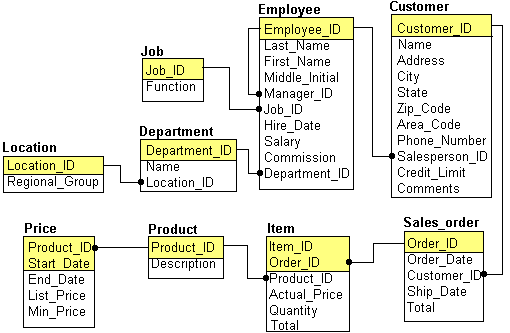

In [ ]:
!pip install psycopg2

In [ ]:
import psycopg2
import pandas as pd
# доступны student-ы от 0 до 9

DB_HOST = '89.223.95.138'
DB_USER = 'student_9'
DB_USER_PASSWORD = 'student_9'
DB_NAME = 'samp'

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)
pd.read_sql_query("select * from customer", conn)

,customer_id,name,address,city,state,zip_code,area_code,phone_number,salesperson_id,credit_limit,comments
0,100,jocksports,345 viewridge,belmont,ca,96711,415,5986609,7844,5000.0,very friendly people to work with -- sales rep...
1,101,tkb sport shop,490 boli rd.,redwood city,ca,94061,415,3681223,7521,10000.0,rep called 5/8 about change in order - contact...
2,102,vollyrite,9722 hamilton,burlingame,ca,95133,415,6443341,7654,7000.0,company doing heavy promotion beginning 10/89....
3,103,just tennis,hillview mall,burlingame,ca,97544,415,6779312,7521,3000.0,contact rep about new line of tennis rackets.
4,104,every mountain,574 surry rd.,cupertino,ca,93301,408,9962323,7499,10000.0,customer with high market share (23%) due to a...
5,105,k + t sports,3476 el paseo,santa clara,ca,91003,408,3769966,7844,5000.0,tends to order large amounts of merchandise at...
6,106,shape up,908 sequoia,palo alto,ca,94301,415,3649777,7521,6000.0,support intensive. orders small amounts (< 800...
7,107,womens sports,valco village,sunnyvale,ca,93301,408,9674398,7499,10000.0,first sporting goods store geared exclusively ...
8,108,north woods health and fitness supply center,98 lone pine way,hibbing,mn,55649,612,5669123,7844,8000.0,
9,201,stadium sports,47 irving pl.,new york,ny,10003,212,5555335,7557,10000.0,large general-purpose sports store with an aff...


### Задание 1
Выбрать всю информацию о каждом отделе и месте его расположения.

In [ ]:
pd.read_sql_query("""
SELECT name, department.location_id, regional_group
FROM department
      INNER JOIN
      location
  ON department.location_id=location.location_id
""", conn)

,name,location_id,regional_group
0,accounting,122,new york
1,research,124,dallas
2,sales,123,chicago
3,operations,167,boston
4,research,122,new york
5,sales,122,new york
6,operations,122,new york
7,sales,124,dallas
8,operations,124,dallas
9,operations,123,chicago


### Задание 2
Выбрать список фамилий сотрудников по городам, где они работают, с указанием для каждого его должности.

In [ ]:
pd.read_sql_query("""
SELECT last_name, department.name, regional_group
FROM employee 
  INNER JOIN 
  department
  ON employee.department_id=department.department_id
  INNER JOIN
        location
  ON department.location_id=location.location_id
""", conn)

,last_name,name,regional_group
0,miller,accounting,new york
1,king,accounting,new york
2,clark,accounting,new york
3,ford,research,dallas
4,adams,research,dallas
5,scott,research,dallas
6,jones,research,dallas
7,smith,research,dallas
8,james,sales,chicago
9,turner,sales,chicago


### Задание 3
 Выбрать всех покупателей, с которыми работает продавец TURNER.

In [ ]:
pd.read_sql_query("""
SELECT customer.name, employee.last_name
FROM  employee
  INNER JOIN 
  customer
  ON employee.employee_id=customer.salesperson_id
WHERE employee.last_name='turner'
""", conn)


,name,last_name
0,jocksports,turner
1,k + t sports,turner
2,north woods health and fitness supply center,turner


### Задание 4
Выбрать сотрудников, которые не закреплены за конкретным заказчиком.

In [ ]:
pd.read_sql_query("""
SELECT employee.last_name
FROM employee
  LEFT JOIN
  customer
  ON employee.employee_id=customer.salesperson_id
WHERE customer.salesperson_id IS NULL
""", conn)

,last_name
0,smith
1,doyle
2,dennis
3,baker
4,jones
5,alberts
6,lewis
7,sommers
8,blake
9,clark


### Задание 5
Выбрать имена продавцов, которые работают более чем с одним покупателем и названия покупателей, которых они обслуживают.

In [ ]:
pd.read_sql_query("""
(SELECT
  count(customer_id),
  salesperson_id
FROM
  customer 
GROUP BY salesperson_id
HAVING count(customer_id)>1)
""", conn)
#подзапрос считает количество клиентов у продавцов

,count,salesperson_id
0,2,7499
1,2,7560
2,3,7521
3,4,7789
4,3,7844
5,7,7820
6,2,7555
7,4,7557
8,2,7600
9,2,7654


In [ ]:
pd.read_sql_query("""
SELECT customer.salesperson_id, customer.name 
FROM customer 
INNER JOIN 
(SELECT
  count(customer_id),
  salesperson_id
FROM
  customer 
GROUP BY salesperson_id
HAVING count(customer_id)>1) D
on customer.salesperson_id=D.salesperson_id
""", conn)
#выбрала имена покупателей, у продовцов из первого запроса

,salesperson_id,name
0,7844,jocksports
1,7521,tkb sport shop
2,7654,vollyrite
3,7521,just tennis
4,7499,every mountain
5,7844,k + t sports
6,7521,shape up
7,7499,womens sports
8,7844,north woods health and fitness supply center
9,7557,stadium sports


In [ ]:
pd.read_sql_query("""
SELECT first_name, name
FROM employee
INNER JOIN 
(SELECT customer.salesperson_id, customer.name 
FROM customer 
INNER JOIN 
(SELECT
  count(customer_id),
  salesperson_id
FROM
  customer 
GROUP BY salesperson_id
HAVING count(customer_id)>1) D
on customer.salesperson_id=D.salesperson_id) R
on employee.employee_id=R.salesperson_id
ORDER BY first_name
""", conn)
#вывожу мена продавцов и имена покупателей

,first_name,name
0,cynthia,shape up
1,cynthia,just tennis
2,cynthia,tkb sport shop
3,daniel,fitness first
4,daniel,century shop
5,gregory,"hit, throw, and run"
6,gregory,al's pro shop
7,karen,the coliseum
8,karen,point guard
9,karen,rebound sports


### Задание 6
Выбрать сумму всех продаж, которые обеспечил продавец TURNER.

In [ ]:
pd.read_sql_query("""
SELECT customer.customer_id, last_name
FROM customer
INNER JOIN 
  employee
  ON employee.employee_id=customer.salesperson_id
WHERE employee.last_name='turner'
""", conn)
#подзапрос вывода кодов всех покупателей продавца Turner

,customer_id,last_name
0,100,turner
1,105,turner
2,108,turner


In [ ]:
pd.read_sql_query("""
SELECT sum(total) AS Sum_Turner
FROM sales_order
INNER JOIN 
(SELECT customer.customer_id, last_name
FROM customer
INNER JOIN 
  employee
  ON employee.employee_id=customer.salesperson_id
WHERE employee.last_name='turner') D
on sales_order.customer_id=D.customer_id
""", conn)
#выбор из таблицы заказов всех покупателей продавца Turner

,sum_turner
0,58055.9


### Задание 7
Выбрать сумму всех продаж товаров, связанных с теннисом, за лето 1990г.

In [ ]:
pd.read_sql_query("""
SELECT order_id
FROM sales_order
WHERE order_date BETWEEN '1990-06-01' AND '1990-08-31'
""", conn)
#нашла продажи за лето 1990 года

,order_id
0,602
1,604
2,605
3,606
4,609
5,607
6,608
7,603
8,539
9,538


In [ ]:
pd.read_sql_query("""
SELECT order_id, description, total
FROM item
INNER JOIN product
ON  item.product_id=product.product_id
WHERE description LIKE '%tennis%'

""", conn)
#выбрала продажи товаров для тенниса 

,order_id,description,total
0,600,ace tennis racket ii,42.0
1,610,ace tennis net,58.0
2,611,ace tennis racket ii,45.0
3,612,ace tennis racket i,3000.0
4,601,ace tennis racket i,32.0
5,602,ace tennis balls-3 pack,56.0
6,604,ace tennis net,174.0
7,604,ace tennis racket ii,84.0
8,604,ace tennis racket i,384.0
9,603,ace tennis racket i,224.0


In [ ]:
pd.read_sql_query("""
SELECT sum(item.total)
FROM product 
inner join item on item.product_id=product.product_id
inner join sales_order on sales_order.order_id=item.order_id
WHERE description LIKE '%tennis%' AND
    order_date BETWEEN '1990-06-01' AND '1990-08-31'

""", conn)
#стала думать и поняла что связи нужны перед выборкой

,sum
0,8492.7


### Задание 8
Выбрать имена и зарплаты самого старого и самого молодого сотрудника фирмы. ("Возраст" сотрудника определять по дате его поступления на работу в фирму).

In [ ]:
pd.read_sql_query("select * from employee", conn)

,employee_id,last_name,first_name,middle_initial,manager_id,job_id,hire_date,salary,commission,department_id
0,7369,smith,john,q,7902.0,667,1984-12-17,800.0,NaN,20
1,7499,allen,kevin,j,7698.0,670,1985-02-20,1600.0,300.0,30
2,7505,doyle,jean,k,7839.0,671,1985-04-04,2850.0,NaN,13
3,7506,dennis,lynn,s,7839.0,671,1985-05-15,2750.0,NaN,23
4,7507,baker,leslie,d,7839.0,671,1985-06-10,2200.0,NaN,14
5,7521,ward,cynthia,d,7698.0,670,1985-02-22,1250.0,500.0,30
6,7555,peters,daniel,t,7505.0,670,1985-03-31,1250.0,300.0,13
7,7557,shaw,karen,p,7505.0,670,1985-04-02,1250.0,1200.0,13
8,7560,duncan,sarah,s,7506.0,670,1985-05-31,1250.0,NaN,23
9,7564,lange,gregory,j,7506.0,670,1985-06-01,1250.0,300.0,23


In [ ]:
pd.read_sql_query("""
SELECT max(hire_date), min(hire_date) FROM employee
""", conn)
#подзапрос выводит макс и мин даты приема

,max,min
0,1987-01-16,1984-12-17


In [ ]:
pd.read_sql_query("""
SELECT last_name, salary, hire_date
FROM employee
WHERE hire_date=(SELECT max(hire_date) FROM employee) or hire_date=(SELECT min(hire_date) FROM employee)
""", conn)
#выбираем зарплаты и имена сотрудника с датами ранвными макс и мин

,last_name,salary,hire_date
0,smith,800.0,1984-12-17
1,murray,750.0,1987-01-16


### Задание 9
Для каждого продавца вывести разность между его зарплатой и средней зарплатой продавцов в фирме.

In [ ]:
pd.read_sql_query("""
SELECT * FROM job
""", conn)
#выяснила что у продавца код 670

,job_id,function
0,667,clerk
1,668,staff
2,669,analyst
3,670,salesperson
4,671,manager
5,672,president


In [ ]:
pd.read_sql_query("""
SELECT job_id, avg(salary)
FROM employee
WHERE job_id=670
GROUP BY job_id
""", conn)
#посчитала среднюю ЗП продавцов

,job_id,avg
0,670,1331.818182


In [ ]:
pd.read_sql_query("""
SELECT employee.job_id, last_name,  first_name, (salary - avg) AS variation
FROM employee
INNER JOIN 
(SELECT job_id, avg(salary)
FROM employee
WHERE job_id=670
GROUP BY job_id) k
ON employee.job_id=k.job_id

""", conn)


,job_id,last_name,first_name,variation
0,670,allen,kevin,268.181818
1,670,ward,cynthia,-81.818182
2,670,peters,daniel,-81.818182
3,670,shaw,karen,-81.818182
4,670,duncan,sarah,-81.818182
5,670,lange,gregory,-81.818182
6,670,porter,raymond,-81.818182
7,670,martin,kenneth,-81.818182
8,670,west,livia,168.181818
9,670,ross,paul,-31.818182


### Задание 10
Вывести имена, средние инициалы и фамилии всех однофамильцев.

In [ ]:
pd.read_sql_query("""
SELECT DISTINCT last_name
FROM employee
""", conn)
#хотела посмотреть есть ли неуникальные фамилии, нет их...

,last_name
0,fisher
1,lewis
2,king
3,ross
4,sommers
5,jones
6,smith
7,peters
8,martin
9,blake


In [ ]:
pd.read_sql_query("""
SELECT concat (last_name, '  ', first_name, '  ', middle_initial) AS FIO
FROM employee t
where t.last_name in (SELECT DISTINCT
            last_name
        FROM employee)  
""", conn)
# в задании написано вывести в одно слово всех одлнофамильцев, их не обнаружила и вывел прпосто всех ...

,fio
0,smith john q
1,allen kevin j
2,doyle jean k
3,dennis lynn s
4,baker leslie d
5,ward cynthia d
6,peters daniel t
7,shaw karen p
8,duncan sarah s
9,lange gregory j


In [ ]:
pd.read_sql_query("""
SELECT concat (last_name, '  ', first_name, '  ', middle_initial) AS FIO
FROM employee
WHERE last_name IN( SELECT last_name FROM employee GROUP BY last_name HAVING count(*) > 1)
""", conn)
#вывела пустую таблицу и уже до кучи сделала совсем простое решение в лоб.

,fio


### Задание 11
Для каждого отдела выбрать процент, который составляют сотрудники отдела от общего числа сотрудников фирмы, и процент, который составляет зарплата отдела от общей зарплаты фирмы.

In [ ]:
pd.read_sql_query("""
SELECT department.name, per_sum, per_count
FROM department
INNER JOIN (SELECT department_id, sum(salary)*100/(SELECT sum(salary) FROM employee) as per_sum, count(salary)*100/(SELECT count(salary) FROM employee) as per_count
FROM employee
group by department_id) t
ON department.department_id=t.department_id
""", conn)
# посчитала процент от ЗП и процент от численности и прицепляю название департамента


,name,per_sum,per_count
0,accounting,14.415157,9
1,research,17.915980,15
2,sales,15.485997,18
3,research,15.939044,12
4,sales,12.108731,15
5,operations,3.624382,3
6,sales,12.355848,15
7,operations,2.965404,3
8,operations,3.047776,3
9,sales,2.141680,3


### Задание 12
Выбрать фамилии начальников тех отделов, которые имеют разветвленную структуру (т.е. тех начальников, у прямых подчиненных которых есть свои подчиненные).

In [ ]:
pd.read_sql_query("""
SELECT last_name
FROM employee
WHERE employee_id in 
(SELECT DISTINCT manager_id
  FROM (SELECT * FROM employee WHERE employee_id in 
            (SELECT DISTINCT manager_id FROM employee WHERE manager_id is not null)) m
  WHERE manager_id is not null)
""", conn)
#самое сложное было разобраться с подчинением, то есть найти начальников, если код менеджера ноль, значит это и есть главный начальник...

,last_name
0,jones
1,alberts
2,king


### Задание 13
Выбрать названия отдела, заключившего сделки на самую большую сумму, и города, в котором он находится.

In [ ]:
pd.read_sql_query("""
SELECT name,
    regional_group
FROM department d
INNER JOIN location l on d.location_id=l.location_id
INNER JOIN (SELECT * 
                FROM employee WHERE employee_id=(SELECT salesperson_id FROM customer 
                                        WHERE customer_id=(SELECT customer_id FROM sales_order where total=(SELECT max(total)
FROM sales_order)))) e 
ON d.department_id=e.department_id

""", conn)

#путем строения многих запросов стало понятно что придется делать несколько соединений, так как использовалось много таблиц, нашла максимум продаж,
#затем департамент где работал продавец ну и город уже в последнюю очередь

,name,regional_group
0,sales,chicago


### Задание 14
Выбрать название товара, дату продажи, цену продажи для всех случаев, когда товары продавались ниже, чем за 75% их объявленной цены.

In [ ]:
pd.read_sql_query(""" 
SELECT
  product.description,
  item.actual_price,
  price.start_date,
  price.end_date,
  sales_order.order_date
FROM
  price
  INNER JOIN
  product
  ON price.product_id = product.product_id
  INNER JOIN
  item
  ON product.product_id = item.product_id
  INNER JOIN
  sales_order
  ON item.order_id = sales_order.order_id
WHERE
  item.actual_price < price.list_price * 0.75
  AND
  (price.start_date <= sales_order.order_date)
  AND
  (sales_order.order_date < price.end_date OR price.end_date IS NULL)
""", conn)

#у подобных задач метод решения сводится к формированию дерева подзапросов по мере перехода от одной таблицы к другой,
#мелкие подзапросы пишу отдельно, но дабы уже не перегружать убрала эти окна в большей части задач

,description,actual_price,start_date,end_date,order_date
0,sb energy bar-6 pack,1.75,1990-11-15,None,1991-02-02
1,yellow jersey bicycle gloves,10.00,1990-06-01,None,1990-09-04
2,yellow jersey bicycle gloves,10.00,1990-06-01,None,1991-03-04


### Задание 15
Выбрать общую сумму скидок, предоставленных покупателю STADIUM SPORTS в 1989г.

In [ ]:
pd.read_sql_query("""
SELECT *
FROM item i
inner join (SELECT ship_date,
    order_id
FROM sales_order s
inner join customer c on c.customer_id=s.customer_id
where ship_date between '1989-01-01' and '1989-12-31'
    and name='stadium sports') r on r.order_id=i.order_id

""", conn)
# выбираю объем продажи товаров для спорта с указанием даты

,order_id,item_id,product_id,actual_price,quantity,total,ship_date,order_id
0,503,1,104350,38.00,30,1140.0,1989-04-06,503
1,503,2,104351,23.60,10,236.0,1989-04-06,503
2,503,3,104352,50.00,10,500.0,1989-04-06,503
3,518,1,104350,38.00,25,950.0,1989-11-05,518
4,518,2,104351,23.60,20,472.0,1989-11-05,518
5,518,3,104360,36.00,20,720.0,1989-11-05,518
6,518,4,104362,4.25,170,722.5,1989-11-05,518
7,518,5,102134,3.40,20,68.0,1989-11-05,518
8,517,1,104352,50.00,15,750.0,1989-11-07,517
9,517,2,102134,3.40,10,34.0,1989-11-07,517


In [ ]:
pd.read_sql_query("""
SELECT *
FROM price p
inner join (SELECT product_id, actual_price, quantity, total, ship_date
FROM item i
inner join (SELECT ship_date,
    order_id
FROM sales_order s
inner join customer c on c.customer_id=s.customer_id
where ship_date between '1989-01-01' and '1989-12-31'
    and name='stadium sports') r on r.order_id=i.order_id) k
on k.product_id=p.product_id 
WHERE (k.ship_date>=p.start_date) OR (p.end_date<=k.ship_date) AND (p.end_date IS NOT NULL)

""", conn)
#добавляю к предыдущему подзапросу данные о ценах и датах акций

,product_id,list_price,min_price,start_date,end_date,product_id,actual_price,quantity,total,ship_date
0,104350,40.0,32.0,1989-01-01,1989-12-31,104350,38.00,30,1140.0,1989-04-06
1,104351,23.6,18.9,1989-01-01,1989-12-31,104351,23.60,10,236.0,1989-04-06
2,104352,50.0,35.0,1989-01-01,1989-12-31,104352,50.00,10,500.0,1989-04-06
3,104350,40.0,32.0,1989-01-01,1989-12-31,104350,38.00,25,950.0,1989-11-05
4,104351,23.6,18.9,1989-01-01,1989-12-31,104351,23.60,20,472.0,1989-11-05
5,104360,36.0,29.5,1989-01-01,1989-12-31,104360,36.00,20,720.0,1989-11-05
6,104362,5.0,4.0,1989-02-15,NaT,104362,4.25,170,722.5,1989-11-05
7,102134,3.4,2.8,1989-08-18,NaT,102134,3.40,20,68.0,1989-11-05
8,104352,50.0,35.0,1989-01-01,1989-12-31,104352,50.00,15,750.0,1989-11-07
9,102134,3.4,2.8,1989-08-18,NaT,102134,3.40,10,34.0,1989-11-07


In [ ]:
pd.read_sql_query("""
SELECT sum(list_price*quantity-k.total) AS sale
FROM price p
inner join (SELECT product_id, actual_price, quantity, total, ship_date
FROM item i
inner join (SELECT ship_date,
    order_id
FROM sales_order s
inner join customer c on c.customer_id=s.customer_id
where ship_date between '1989-01-01' and '1989-12-31'
    and name='stadium sports') r on r.order_id=i.order_id) k
on k.product_id=p.product_id 
WHERE (k.ship_date>=p.start_date) OR (p.end_date<=k.ship_date) AND (p.end_date IS NOT NULL)

""", conn)
#считаю сумму скидки
#(list_price-actual_price)*quantity)
#list_price*quantity-k.total

,sale
0,356.9


### Задание 16
Выбрать список сотрудников фирмы с указанием фамилии непосредственного начальника каждого.

In [ ]:
pd.read_sql_query("""
SELECT x.last_name, y.last_name
   FROM employee x, employee y
   WHERE x.manager_id=y.employee_id
   ORDER BY 1
""", conn)
#соединение внутри одной таблицы


,last_name,last_name
0,adams,scott
1,alberts,king
2,allen,blake
3,baker,king
4,blake,king
5,clark,king
6,dennis,king
7,douglas,fisher
8,doyle,king
9,duncan,dennis


### Задание 17
 Для каждого сотрудника вывести разность между его зарплатой и средней зарплатой сотрудников, выполняющих те же функции.

In [ ]:
pd.read_sql_query("""
SELECT *
FROM job

""", conn)
#подзапрос 1

,job_id,function
0,667,clerk
1,668,staff
2,669,analyst
3,670,salesperson
4,671,manager
5,672,president


In [ ]:
pd.read_sql_query("""
SELECT job_id, avg(salary) as avg_salary from employee group by    
             job_id
""", conn)
#подзапрос на базе 1

,job_id,avg_salary
0,667,921.428571
1,668,1825.000000
2,670,1331.818182
3,669,2968.750000
4,672,5000.000000
5,671,2725.000000


In [ ]:
pd.read_sql_query("""
SELECT a.last_name, 
           a.first_name, 
           (a.salary-b.avg_salary) as salary_difference
FROM employee a
INNER JOIN (SELECT job_id, avg(salary) as avg_salary from employee group by job_id) b
    ON a.job_id = b.job_id
""", conn)
#считаю среднюю ЗП по виду работ и сравниваю с ЗП каждого сотрудника

,last_name,first_name,salary_difference
0,smith,john,-121.428571
1,allen,kevin,268.181818
2,doyle,jean,125.000000
3,dennis,lynn,25.000000
4,baker,leslie,-525.000000
5,ward,cynthia,-81.818182
6,peters,daniel,-81.818182
7,shaw,karen,-81.818182
8,duncan,sarah,-81.818182
9,lange,gregory,-81.818182


### Задание 18
Вывести таблицу распределения объема продаж товара DUNK BASKETBALL INDOOR по годам.



In [ ]:
pd.read_sql_query("""
SELECT product_id
FROM product
WHERE description='dunk basketball indoor'
""", conn)
#найду сам товар

,product_id
0,104350


In [ ]:
pd.read_sql_query("""
SELECT total, order_id
FROM item q
INNER JOIN (SELECT product_id
FROM product
WHERE description='dunk basketball indoor') d
ON q.product_id=d.product_id
""", conn)
#выделяем сумму продажи и номер ордера


,total,order_id
0,1045.0,574
1,440.0,576
2,1140.0,503
3,950.0,518
4,660.0,544
5,420.0,524
6,1196.7,529
7,400.0,504
8,1672.0,578
9,420.0,534


In [ ]:
pd.read_sql_query("""
SELECT order_id, customer_id, extract(year from order_date) ship_year
FROM sales_order 
""", conn)
#выводим номер ордера и год из даты продажи, а также код покупателя


,order_id,customer_id,ship_year
0,610,101,1991.0
1,611,102,1991.0
2,612,104,1991.0
3,601,106,1990.0
4,602,102,1990.0
...,...,...,...
95,530,208,1990.0
96,545,208,1990.0
97,557,208,1991.0
98,546,208,1990.0


In [ ]:
pd.read_sql_query("""
SELECT ship_year, sum(total)
FROM item q

INNER JOIN (SELECT product_id
FROM product
WHERE description='dunk basketball indoor') d
ON q.product_id=d.product_id

INNER JOIN (SELECT order_id, customer_id, extract(year from order_date) ship_year
FROM sales_order ) k
ON q.order_id=k.order_id

GROUP BY ship_year

""", conn)
#итоговый запрос сумма продаж по годам по выбранному виду товара

,ship_year,sum
0,1989.0,5830.0
1,1990.0,5337.3
2,1991.0,3597.0


### Задание 19
Выбрать фамилии тех сотрудников, у которых суммарный доход (зарплата + комиссионные) больше 2000.

In [ ]:
pd.read_sql_query("""
SELECT last_name, salary, commission, (salary+commission) AS PROFIT
FROM employee
ORDER BY last_name
""", conn)
#возможно я слишком прямолинейно поняла эту задачу, но решение без подзапросов и даже без связей .... 
#WHERE (salary+commission)>2000

,last_name,salary,commission,profit
0,adams,1100.0,NaN,NaN
1,alberts,3000.0,NaN,NaN
2,allen,1600.0,300.0,1900.0
3,baker,2200.0,NaN,NaN
4,blake,2850.0,NaN,NaN
5,clark,2450.0,NaN,NaN
6,dennis,2750.0,NaN,NaN
7,douglas,800.0,NaN,NaN
8,doyle,2850.0,NaN,NaN
9,duncan,1250.0,NaN,NaN


In [ ]:
pd.read_sql_query("""
SELECT last_name, (commission+salary) AS profit
  FROM employee
  WHERE commission IS NOT NULL AND (commission+salary)>2000
UNION
SELECT last_name, salary
  FROM employee
  WHERE commission IS NULL AND salary>2000
ORDER BY 1
""", conn)

#утащила с разбора на хабре и добавила наше условие про 2000

,last_name,profit
0,alberts,3000.0
1,baker,2200.0
2,blake,2850.0
3,clark,2450.0
4,dennis,2750.0
5,doyle,2850.0
6,fisher,3000.0
7,ford,3000.0
8,jones,2975.0
9,king,5000.0


### Задание 20
Выбрать названия товаров, для которых нынешняя цена увеличилась по сравнению с ценой на 15 декабря 1989г. более, чем на 15%.

In [ ]:
pd.read_sql_query("""
SELECT p.product_id,
    description, p.list_price act_price, ap.list_price d_price, (p.list_price-ap.list_price)*100/ap.list_price as delta
FROM price p
    inner join product pr on pr.product_id=p.product_id
    left join (SELECT *
                FROM price p
                WHERE p.start_date<='1989-12-15' and (p.end_date>='1989-12-31' or p.end_date is null)) 
                        ap on p.product_id=ap.product_id
WHERE p.end_date IS NULL and ((p.list_price-ap.list_price)*100/ap.list_price)>15

""", conn)
#опять таки возможно субъективно но уж очень неоднородные по сложности задачи, с учетом того, что одну на "уроке" разобрали...

,product_id,description,act_price,d_price,delta
0,100860,ace tennis racket i,35.0,30.0,16.666667
1,100861,ace tennis racket ii,45.0,39.0,15.384615
2,104352,dunk basketball professional,58.3,50.0,16.600000
3,105124,yellow jersey bicycle gloves,15.0,10.0,50.000000
4,105125,yellow jersey water bottle,3.0,2.0,50.000000
5,105126,yellow jersey bottle cage,6.0,5.0,20.000000
